In [40]:
import json
import pandas as pd

#project_name = "."
project_name = "jfreechart"
#project_name = "argouml"
class_dependency_file = "input/" + project_name + "/all-ug.cmr"
with open(class_dependency_file, 'r') as file:
    class_dependency_data = json.load(file)

class_id_file = "input/" + project_name + "/idmap.json"
with open(class_id_file, 'r') as file:
    class_id_data = json.load(file)

In [41]:
class_dependency_graph_data = class_dependency_data['graph']
print("Keys in the graph:", class_dependency_graph_data.keys())

Keys in the graph: dict_keys(['vList', 'eList', 'lMap', 'clusterMap'])


In [42]:
# Get key from value
def get_key(val): 
    for key, value in class_id_data['keys'].items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

# Get the class name from the class id
def get_class_name(class_id):
    class_name_with_prefix = get_key(class_id)
    class_name = class_name_with_prefix.split('L')[1]
    return class_name

In [43]:
# Generate the graph data
import networkx as nx

G = nx.MultiDiGraph()

def add_nodes_to_graph(graph, nodes):
    for node in nodes:
        class_id = node['type']
        class_name = get_class_name(class_id)
        print("Class name:", class_name)
        graph.add_node(class_name)
        
add_nodes_to_graph(G, class_dependency_graph_data['vList'])

Class name: org.jfree.chart.entity.EntityCollection
Class name: org.jfree.data.statistics.DefaultStatisticalCategoryDataset
Class name: org.jfree.data.gantt.Task
Class name: org.jfree.chart.event.ChartProgress
Class name: org.jfree.chart.util.DirectionalGradientPaintTransformer
Class name: org.jfree.data.statistics.BoxAndWhiskerXYDataset
Class name: org.jfree.chart.entity.StandardEntityCollection
Class name: org.jfree.chart.entity.
Class name: org.jfree.chart.util.ExportUtils
Class name: org.jfree.data.UnknownKeyException
Class name: org.jfree.chart.plot.pie.PiePlot
Class name: org.jfree.chart.renderer.WaferMapRenderer
Class name: org.jfree.data.xy.XIntervalDataItem
Class name: org.jfree.chart.legend.
Class name: org.jfree.chart.text.TextFragment
Class name: org.jfree.chart.labels.CategoryToolTipGenerator
Class name: org.jfree.chart.plot.SeriesRenderingOrder
Class name: org.jfree.data.statistics.DefaultMultiValueCategoryDataset
Class name: org.jfree.data.general.KeyedValuesDataset
Clas

In [44]:
def add_edges_to_graph(graph, edgeList):
    for edges in edgeList:
        for edge in edges['L']:
            source_class_id = edge['s']
            source_class_name = get_class_name(source_class_id)
            destination_class_id = edge['d']
            destination_class_name = get_class_name(destination_class_id)
            weight = edge['w']
            print(f"Edge: {source_class_name} -> {destination_class_name}, weight: {weight}")
            graph.add_edge(source_class_name, destination_class_name, weight=weight)

add_edges_to_graph(G, class_dependency_graph_data['eList'])

Edge: org.jfree.data.xy.YIntervalSeriesCollection -> org.jfree.chart.api.PublicCloneable, weight: 1
Edge: org.jfree.chart.ChartFactory -> org.jfree.chart.plot.ValueMarker, weight: 1
Edge: org.jfree.chart.ChartFactory -> org.jfree.data.category.CategoryDataset, weight: 12
Edge: org.jfree.chart.renderer.category.BarRenderer -> org.jfree.chart.plot.PlotRenderingInfo, weight: 1
Edge: org.jfree.chart.renderer.xy.AbstractXYItemRenderer -> org.jfree.chart.plot.DrawingSupplier, weight: 4
Edge: org.jfree.chart.annotations.XYTitleAnnotation -> org.jfree.data.Range, weight: 4
Edge: org.jfree.chart.annotations.XYTitleAnnotation -> org.jfree.data.Range, weight: 2
Edge: org.jfree.chart.annotations.XYTitleAnnotation -> org.jfree.data.Range, weight: 6
Edge: org.jfree.data.time.TimeTableXYDataset -> org.jfree.data.xy.AbstractXYDataset, weight: 1
Edge: org.jfree.chart.renderer.xy.YIntervalRenderer -> org.jfree.chart.renderer.xy.AbstractXYItemRenderer, weight: 1
Edge: org.jfree.chart.renderer.xy.YInterva

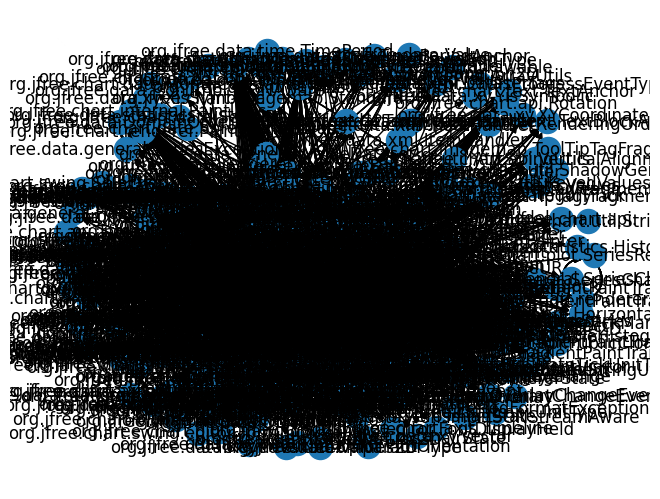

In [45]:
# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [47]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t')
    return data

def remove_empty_rows(data):
    data = data.dropna(subset=['Name'])
    return data

def remove_unnamed_columns(data):
    data = data.filter(regex='^(?!Unnamed.*)')
    return data

def remove_nan_columns(data):
    data = data.dropna(axis=1, how='all')
    return data

def remove_package_rows(data):
    data = data.dropna(subset=['CBO', 'DIT'])
    return data

def convert_ordinal_to_numerical(data):
    ordinal_mapping = {
        'low': 1,
        'low-medium': 2,
        'medium-high': 3,
        'high': 4,
        'very-high': 5
    }
    columns_to_convert = ['Complexity', 'Coupling', 'Size', 'Lack of Cohesion']
    for column in columns_to_convert:
        data[column] = data[column].replace(ordinal_mapping)
    return data

dataset_file = "input/" + project_name + "/class-metrics-dataset.csv"
dataset = load_data(dataset_file)
dataset = remove_empty_rows(dataset)
dataset = remove_unnamed_columns(dataset)
dataset = remove_nan_columns(dataset)
dataset = remove_package_rows(dataset)
dataset = convert_ordinal_to_numerical(dataset)

print(dataset.head())

                         QualifiedName                 Name  Complexity   
2           org.jfree.chart.ChartColor           ChartColor           2  \
3         org.jfree.chart.ChartElement         ChartElement           1   
4  org.jfree.chart.ChartElementVisitor  ChartElementVisitor           1   
5         org.jfree.chart.ChartFactory         ChartFactory           5   
6           org.jfree.chart.ChartHints           ChartHints           1   

   Coupling  Size  Lack of Cohesion   CBO    RFC  SRFC  DIT  ...  NOF  NOSF   
2         1     2                 1   0.0    2.0   0.0  2.0  ...  0.0  24.0  \
3         1     1                 1   1.0    1.0   0.0  1.0  ...  0.0   0.0   
4         1     1                 1   1.0    1.0   0.0  1.0  ...  0.0   0.0   
5         5     3                 3  81.0  232.0  84.0  1.0  ...  0.0   1.0   
6         1     1                 1   0.0    1.0   0.0  1.0  ...  0.0   2.0   

   NOM  NOSM  NORM  LCOM   LCAM   LTCC  ATFD   SI  
2  1.0   1.0   0.0   0

In [48]:
def label_god_class(row, complexity_threshold=2, size_threshold=2):
    if row['Complexity'] > complexity_threshold and row['Size'] > size_threshold:
        return 1
    else:
        return 0

# Label the dataset
dataset['is_god_class'] = dataset.apply(label_god_class, axis=1)

# Count the number of God Components
num_dataset_rows = dataset.shape[0]
num_god_components = dataset['is_god_class'].sum()
print(f'Number of instances in the dataset: {num_dataset_rows}')
print(f'Number of God Components in the dataset: {num_god_components}')

Number of instances in the dataset: 633
Number of God Components in the dataset: 68


In [49]:
def remove_labeling_columns(data):
    data = data.drop(['Name', 'Complexity', 'Coupling', 'Size', 'Lack of Cohesion'], axis=1)
    return data

dataset = remove_labeling_columns(dataset)
print(dataset.head())

                         QualifiedName   CBO    RFC  SRFC  DIT  NOC    WMC   
2           org.jfree.chart.ChartColor   0.0    2.0   0.0  2.0  0.0    2.0  \
3         org.jfree.chart.ChartElement   1.0    1.0   0.0  1.0  7.0    1.0   
4  org.jfree.chart.ChartElementVisitor   1.0    1.0   0.0  1.0  0.0    1.0   
5         org.jfree.chart.ChartFactory  81.0  232.0  84.0  1.0  0.0  137.0   
6           org.jfree.chart.ChartHints   0.0    1.0   0.0  1.0  0.0    1.0   

     LOC  CMLOC  NOF  NOSF  NOM  NOSM  NORM  LCOM   LCAM   LTCC  ATFD   SI   
2   64.0   39.0  0.0  24.0  1.0   1.0   0.0   0.0  0.250  1.000   0.0  0.0  \
3    2.0    1.0  0.0   0.0  1.0   0.0   0.0   0.0  0.000  0.000   0.0  0.0   
4    2.0    1.0  0.0   0.0  1.0   0.0   0.0   0.0  0.000  0.000   0.0  0.0   
5  782.0  780.0  0.0   1.0  0.0  50.0   0.0   0.0  0.799  0.569   3.0  0.0   
6   17.0    1.0  0.0   2.0  1.0   0.0   0.0   0.0  0.000  0.000   0.0  0.0   

   is_god_class  
2             0  
3             0  
4       

In [50]:
# Embedding software metrics in dataset to nodes in the graph
def get_node_embedding(node, data):
    node_embedding = data[data['QualifiedName'].apply(lambda x: node in x)]
    return node_embedding

def get_node_embedding_list(graph, data):
    node_embedding_list = []
    for node, node_data in graph.nodes(data=True):
        node_embedding = get_node_embedding(node, data)
        node_data['CBO'] = node_embedding['CBO'].iloc[0]
        node_data['RFC'] = node_embedding['RFC'].iloc[0]
        node_data['SRFC'] = node_embedding['SRFC'].iloc[0]
        node_data['DIT'] = node_embedding['DIT'].iloc[0]
        node_data['NOC'] = node_embedding['NOC'].iloc[0]
        node_data['WMC'] = node_embedding['WMC'].iloc[0]
        node_data['LOC'] = node_embedding['LOC'].iloc[0]
        node_data['CMLOC'] = node_embedding['CMLOC'].iloc[0]
        node_data['NOF'] = node_embedding['NOF'].iloc[0]
        node_data['NOSF'] = node_embedding['NOSF'].iloc[0]
        node_data['NOM'] = node_embedding['NOM'].iloc[0]
        node_data['NOSM'] = node_embedding['NOSM'].iloc[0]
        node_data['NORM'] = node_embedding['NORM'].iloc[0]
        node_data['LCOM'] = node_embedding['LCOM'].iloc[0]
        node_data['LCAM'] = node_embedding['LCAM'].iloc[0]
        node_data['LTCC'] = node_embedding['LTCC'].iloc[0]
        node_data['ATFD'] = node_embedding['ATFD'].iloc[0]
        node_data['SI'] = node_embedding['SI'].iloc[0]
        node_data['is_god_class'] = node_embedding['is_god_class'].iloc[0]
        node_embedding_list.append(node_data)
    return node_embedding_list

node_embedding_list = get_node_embedding_list(G, dataset)
print(node_embedding_list)

[{'CBO': 1.0, 'RFC': 8.0, 'SRFC': 0.0, 'DIT': 1.0, 'NOC': 1.0, 'WMC': 8.0, 'LOC': 9.0, 'CMLOC': 8.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 8.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.7, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 0.0, 'is_god_class': 0}, {'CBO': 4.0, 'RFC': 90.0, 'SRFC': 37.0, 'DIT': 2.0, 'NOC': 0.0, 'WMC': 86.0, 'LOC': 280.0, 'CMLOC': 264.0, 'NOF': 13.0, 'NOSF': 0.0, 'NOM': 30.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.818, 'LCAM': 0.754, 'LTCC': 0.367, 'ATFD': 1.0, 'SI': 0.0, 'is_god_class': 0}, {'CBO': 3.0, 'RFC': 25.0, 'SRFC': 10.0, 'DIT': 1.0, 'NOC': 0.0, 'WMC': 22.0, 'LOC': 66.0, 'CMLOC': 60.0, 'NOF': 4.0, 'NOSF': 1.0, 'NOM': 16.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.717, 'LCAM': 0.806, 'LTCC': 0.65, 'ATFD': 0.0, 'SI': 0.0, 'is_god_class': 0}, {'CBO': 3.0, 'RFC': 8.0, 'SRFC': 1.0, 'DIT': 2.0, 'NOC': 0.0, 'WMC': 7.0, 'LOC': 24.0, 'CMLOC': 20.0, 'NOF': 3.0, 'NOSF': 0.0, 'NOM': 7.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.667, 'LCAM': 0.6, 'LTCC': 0.571, 'ATFD': 0.0, 'SI': 0.0, 'is

In [51]:
# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.jfree.chart.entity.EntityCollection, embedding: {'CBO': 1.0, 'RFC': 8.0, 'SRFC': 0.0, 'DIT': 1.0, 'NOC': 1.0, 'WMC': 8.0, 'LOC': 9.0, 'CMLOC': 8.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 8.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.7, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 0.0, 'is_god_class': 0}
Node: org.jfree.data.statistics.DefaultStatisticalCategoryDataset, embedding: {'CBO': 4.0, 'RFC': 90.0, 'SRFC': 37.0, 'DIT': 2.0, 'NOC': 0.0, 'WMC': 86.0, 'LOC': 280.0, 'CMLOC': 264.0, 'NOF': 13.0, 'NOSF': 0.0, 'NOM': 30.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.818, 'LCAM': 0.754, 'LTCC': 0.367, 'ATFD': 1.0, 'SI': 0.0, 'is_god_class': 0}
Node: org.jfree.data.gantt.Task, embedding: {'CBO': 3.0, 'RFC': 25.0, 'SRFC': 10.0, 'DIT': 1.0, 'NOC': 0.0, 'WMC': 22.0, 'LOC': 66.0, 'CMLOC': 60.0, 'NOF': 4.0, 'NOSF': 1.0, 'NOM': 16.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.717, 'LCAM': 0.806, 'LTCC': 0.65, 'ATFD': 0.0, 'SI': 0.0, 'is_god_class': 0}
Node: org.jfree.chart.event.ChartProgress, embedding: {'CBO

In [52]:
# Save the graph data to a file
import pickle

with open('output/graph_data_for_god_class.pickle', 'wb') as file:
    pickle.dump(G, file)

In [53]:
# Load the graph data from a file
import pickle

with open('output/graph_data_for_god_class.pickle', 'rb') as file:
    G = pickle.load(file)

# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.jfree.chart.entity.EntityCollection, embedding: {'CBO': 1.0, 'RFC': 8.0, 'SRFC': 0.0, 'DIT': 1.0, 'NOC': 1.0, 'WMC': 8.0, 'LOC': 9.0, 'CMLOC': 8.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 8.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.7, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 0.0, 'is_god_class': 0}
Node: org.jfree.data.statistics.DefaultStatisticalCategoryDataset, embedding: {'CBO': 4.0, 'RFC': 90.0, 'SRFC': 37.0, 'DIT': 2.0, 'NOC': 0.0, 'WMC': 86.0, 'LOC': 280.0, 'CMLOC': 264.0, 'NOF': 13.0, 'NOSF': 0.0, 'NOM': 30.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.818, 'LCAM': 0.754, 'LTCC': 0.367, 'ATFD': 1.0, 'SI': 0.0, 'is_god_class': 0}
Node: org.jfree.data.gantt.Task, embedding: {'CBO': 3.0, 'RFC': 25.0, 'SRFC': 10.0, 'DIT': 1.0, 'NOC': 0.0, 'WMC': 22.0, 'LOC': 66.0, 'CMLOC': 60.0, 'NOF': 4.0, 'NOSF': 1.0, 'NOM': 16.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.717, 'LCAM': 0.806, 'LTCC': 0.65, 'ATFD': 0.0, 'SI': 0.0, 'is_god_class': 0}
Node: org.jfree.chart.event.ChartProgress, embedding: {'CBO